In [2]:


import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt



# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [3]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [4]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

### Data "cleaning" just in case

In [5]:
age = df["Age"]
#clean out any nans
age = age[~np.isnan(age)]

## Age Hist

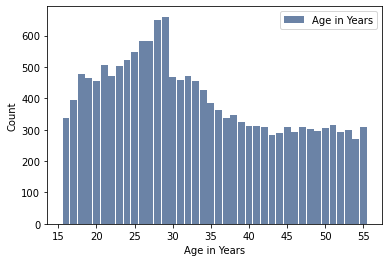

In [6]:
ageHist = thinkstats2.Hist(age, label="Age in Years")
thinkplot.Hist(ageHist)
thinkplot.Config(xlabel = "Age in Years", ylabel = "Count")

## Age PMF

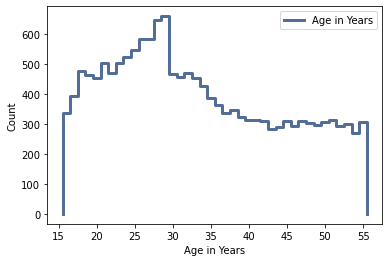

In [7]:
# we'll use the `ageHist` variable to do the pmf, I don't think there is any pressing reason to do otherwise
thinkplot.pmf(ageHist)
thinkplot.config(xlabel = "Age in Years", ylabel = "Count")

#### What fraction of the people in the data are 51? What fraction are older than 51?

In [8]:
# I made functions up here just to keep the next code block a bit cleaner
# lets do a little function that will return the percent of people at a certain value
def PercentAtValue(scores, value):
    # this only works with whole numbers...
    lower = value - 1
    higher = value + 1
    return 100.0 * (scores[higher] - scores[lower])

# Get the total percent of scores above a given value~
def TotalPercentAboveValue(scores, value):
    count = 0
    for score in scores:
        if score > value:
            count += 1
    
    returnPercent = 100.0 * count / len(scores)
    return returnPercent

## Percent(fraction) at exactly 51

In [9]:
ageCdf = thinkstats2.Cdf(age)
print("Percent of ages at exactly 51: ", round(PercentAtValue(ageCdf, 51),2), "%")

Percent of ages at exactly 51:  3.8 %


If we want to get real perscriptive the fraction for 3.8% is 19/500 [source](https://www.wolframalpha.com/input?i=fraction+for+0.038)

## Percent(fraction) above 51

In [10]:
print("Percent of ages above 51: ", round(TotalPercentAboveValue(age, 51), 2), "%")

Percent of ages above 51:  7.32 %


Fraction of 7.32% is 183/2500 [source](https://www.wolframalpha.com/input?i=fraction+for+0.0732)

##### What is the median age?

In [11]:
print("Median age in years: ",age.median())

Median age in years:  31.0


##### Does the distribution of the sample data seem to mirror the working age population?

I think it mirrors the working age population (for the 1970s), I think that drop between 28 and 29 can be explained by a few things.
 1. People (predominantly women) leaving the workforce to become stay at home parents. 
 1. The post world war 2 baby boom that started in 1946 would explain why there are more folks around 30 in the workforce because there were more people in total.
 1. There will always be a tailing off of people that are working as a population gets older as they become less able to work and more able to retire.

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

## US statistics for 1978 
First, we will assume the data we have is from 1978 or later, we can assume this because we know the earnings for each person in 1978.
From the US census.gov site we will pull what we can for 1978. [This was the PDF I used for these stats](https://www2.census.gov/library/publications/1978/compendia/statab/99ed/1978-01.pdf)


 * % of US population "NotBlack" & "NotHispanic" (does this mean caucasian, or should we include aboriginals etc?) **87.5** <sup>Page 35</sup>
 * % of US population "black" & "NotHispanic" **11.1** <sup>Page 35</sup>
 * % of US population "NotBlack" & "hispanic" **5.1** <sup>Page 32</sup>

In [12]:
# lets get seperate our df into three groups
whiteCount = len(df[(df["Race"] == "NotBlack") & (df["Hisp"] == "NotHispanic")])
blackCount = len(df[(df["Race"] == "black") & (df["Hisp"] == "NotHispanic")])
hispanicCount = len(df[(df["Hisp"] == "hispanic") & (df["Race"] == "NotBlack")])
hispanicAndBlackCount = len(df[(df["Hisp"] == "hispanic") & (df["Race"] == "black")]) 
# `hispanicAndBlackCount` should be zero, because our data is old and a bit racist?
print("Count of both hispanic and black: ", hispanicAndBlackCount)

Count of both hispanic and black:  0


Since we have no records that are both hispanic and black we'll ignore that as a possiblity from here on out

In [13]:
#Maths!
# get the totalnumber
totalSample = len(df)

print("Sample white percent of population(should be about 0.875): ", round(whiteCount/totalSample,3))
print("Sample black percent of population(should be about 0.111): ", round(blackCount/totalSample,3))
print("Sample hispanic percent of population(should be about 0.051): ", round(hispanicCount/totalSample,3))

Sample white percent of population(should be about 0.875):  0.854
Sample black percent of population(should be about 0.111):  0.074
Sample hispanic percent of population(should be about 0.051):  0.072


Our race data lines up nicely, lets do check what portion of Americans had high school or better education in 1978. From our census pdf on page 38 we can see that 65% of all races have completed highschool or better, white peopleare about 67% and black people are 46% in 1977. I'll make an assumption that 1978 isn't all that different.

In [30]:
# The irony that Education is the column name that is spelt wrong
allHighSchoolOrBetterCount = len(df[~(df["Eduacation"] == "LessThanHighSchool")])
whiteHighSchoolOrBetterCount = len(df[~(df["Eduacation"] == "LessThanHighSchool") & (df["Race"] == "NotBlack")])
blackHighSchoolOrBetterCount = len(df[~(df["Eduacation"] == "LessThanHighSchool") & (df["Race"] == "black")])
# totalSample is the variable created above that has the total count of records in the dataframe
print("People in sample with highschool or above education (should be about 0.65): ", round(allHighSchoolOrBetterCount/totalSample,3))
print("People in sample with highschool or above education that are \"NotBlack\" (should be about 0.67): ", round(whiteHighSchoolOrBetterCount/whiteCount,3))
print("People in sample with highschool or above education that are \"Black\" (should be about 0.46): ", round(blackHighSchoolOrBetterCount/blackCount,3))


People in sample with highschool or above education (should be about 0.65):  0.704
People in sample with highschool or above education that are "NotBlack" (should be about 0.67):  0.349
People in sample with highschool or above education that are "Black" (should be about 0.46):  0.566


In [29]:
df["Eduacation"].value_counts()

HighSchool            6252
LessThanHighSchool    4731
Intermediate          2708
graduate              1367
PostGraduate           934
Name: Eduacation, dtype: int64

##### Demographic Conclusion

Our sample looks **representative** to the US population from 1978, based on race. The biggest difference is the black population which is off by 3.7% the other two are off by 2.1%. 

### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.
    <ul>
    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

## Question 1 
What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?

In [36]:
# get the earnings into pandas series objects so that we can use seaborn to graph them below
earnings1974Series = pd.Series(round(df["Earnings_1974"],-2))
earnings1975Series = pd.Series(round(df["Earnings_1975"], -2))
earnings1978Series = pd.Series(round(df["Earnings_1978"], -2))

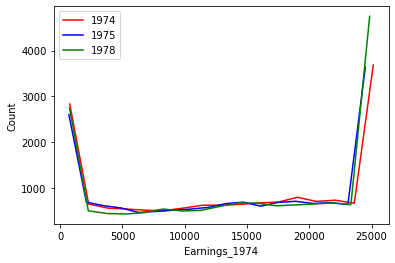

In [38]:
sns.histplot(data=earnings1974Series, color="red", stat="count", kde=False, element="poly", fill=False, label="1974")
sns.histplot(data=earnings1975Series, color="blue", stat="count", kde=False, element="poly", fill=False, label="1975")
sns.histplot(data=earnings1978Series, color="green", stat="count", kde=False, element="poly", fill=False, label="1978")
plt.legend()


### What happened between 1974 and 1978
Between 1974 and 1978 the earnings of this group of Americans mostly stayed the same. The biggest change was in the top earners, in 1978 the 10% with the highest earnings seemed to grow by about 1000 people. That is made clear by the fact that the green line (1978) on the right hand side of the graph is much higher than the red line (1974).

## Question 2
Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? What could you investigate further in an attempt to explain this?

In [55]:
race_black = df[df["Race"] == "black"]
race_notBlack = df[df["Race"] == "NotBlack"]
print("Effect size on earnings by race: ", thinkstats2.CohenEffectSize(race_black["Earnings_1978"], race_notBlack["Earnings_1978"]))

hispanic_hispanic = df[df["Hisp"] == "hispanic"]
hispanic_notHispanic = df[df["Hisp"] == "NotHispanic"]
print("Effect size on earnings by hispanic: ", thinkstats2.CohenEffectSize(hispanic_hispanic["Earnings_1978"], hispanic_notHispanic["Earnings_1978"]))

marital_married = df[df["MaritalStatus"] == "Married"]
marital_notMarried = df[df["MaritalStatus"] == "NotMarried"]
print("Effect size on earnings by marital status: ", thinkstats2.CohenEffectSize(marital_married["Earnings_1978"], marital_notMarried["Earnings_1978"]))

nodeg_true = df[df["Nodeg"] == 1]
nodeg_false = df[df["Nodeg"] == 0]
print("Effect size on earnings by no degree: ", thinkstats2.CohenEffectSize(nodeg_true["Earnings_1978"], nodeg_false["Earnings_1978"]))

Effect size on earnings by race:  -0.31883255859070525
Effect size on earnings by hispanic:  -0.16210284395555566
Effect size on earnings by marital status:  0.5737396692403472
Effect size on earnings by no degree:  -0.3367928897615812


### Breakdown of effects on 1978 Earnings
1. Race has a medium effect size on earnings in 1978
1. Hispanic has a small effect size on earnings in 1978
1. Marital status has a large effect sizze on earnings in 1978
1. Nodeg has a medium effect size on earnings in 1978

To explain this particular outcome I'd want to know if they had asked for household earnings or individual earnings. Houshold earnings would drive the married numbers up because there is a higher possibility that in households with married couples there are multiple income earners. We could also investigate whether the married folks are older and therfore have had more time to progress in their career, thus causing the income to go up.

## Question 4

Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. What can you infer from the presence of outliers that may impact analysis of this data.

null values in 1978 earings: 0


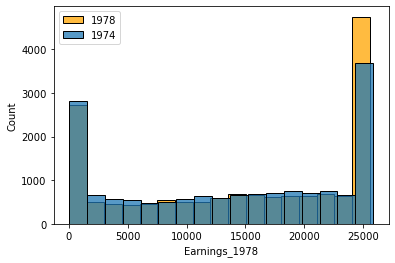

In [62]:

sns.histplot(data= df["Earnings_1978"], color="orange", label="1978") 
sns.histplot(data= df["Earnings_1974"], label="1974")
plt.legend()
print("null values in 1978 earings:", df["Earnings_1978"].isnull().sum())

In [66]:
print("number of records with the 1974 max amount: ", len(df[df["Earnings_1974"] == 25862.32]))
print("number of records with the 1978 max amount: ", len(df[df["Earnings_1978"] == 25564.67]))

number of records with the 1974 max amount:  3052
number of records with the 1978 max amount:  4145


There are outliers in the 1978 earnings data, all the other bins basically line up with the 1974 data except for the maximum amount bin which has almost 1100 more people. 

Outliers can make the mean higher and make comparing means between the 3 years difficult. Outliers could change the effect size when comparing two diferent years because the outlier would increase variability and could also affect the standard deviation.